In [18]:
%matplotlib notebook
%matplotlib inline

In [19]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
CARPETA_DATOS_ORIGINALES = 'Datos/Originales/'
df_sabi_1= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_modif_1.xlsx'))
df_sabi_2= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_modif_2.xlsx'))
df_dealroom= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_dealroom_modif.xlsx'))

In [4]:
df_sabi_1.head(2)

,Codigo_NIF,Nombre_sabi,Localidad,Fecha constitucion,Codigo consolidacion,Codigo primario CNAE 2009,Forma juridica,Forma juridica detallada,Estado,Estado detallado,Capital social mil EUR,Free capital mil EUR,Porcentaje_adquisicion_cat
0,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,MADRID,1985/06/05,U2,6190,Sociedad anonima,Sociedad anónima unipersonal,Activa,Activa,2000.0,0.0,2
1,B75103515,IRIZAR E-MOBILITY SL.,ADUNA,2014/01/21,U1,2910,Sociedad limitada,Sociedad limitada,Activa,Activa,20500.0,0.0,1


In [5]:
df_dealroom.head(2)

,Codigo_NIF,name_dealroom,profile_url,website,tagline,total_funding,first_funding_date,last_funding_date,last_funding,last_round,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022
0,A78053147,Hostalia,https://app.dealroom.co/companies/hostalia,http://hostalia.com,NaN,0.0,NaN,NaN,NaN,NaN,0,NaN,bootstrapped,business,saas,early growth,operational,NaN
1,B75103515,Irizar E-Mobility,https://app.dealroom.co/companies/irizar_e_mob...,http://irizar-emobility.com,Integral Solutions for Custom Electromobility ...,NaN,jan/2014,jan/2014,NaN,SUPPORT PROGRAM,1,115.0,accelerator,business,NaN,late growth,operational,NaN


In [7]:
sns.pairplot(df_dealroom)

variable Growth_stage en cada fase cuantas empresas hay

In [22]:
n_empresas = df_dealroom.groupby('growth_stage')['Codigo_NIF'].count().reset_index()
n_empresas

,growth_stage,Codigo_NIF
0,early growth,120
1,late growth,29
2,seed,262


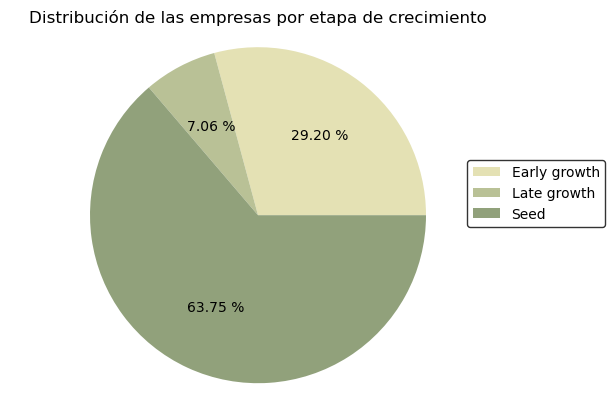

<Figure size 640x480 with 0 Axes>

In [52]:
def my_autopct(pct):
    return ('%.2f %%' % pct) if pct > 1.5 else ''
    
observaciones_cluster = n_empresas['Codigo_NIF']
nombres = ["Early growth","Late growth","Seed"]
colores = ["#E4E1B4","#B9C196","#91A17B"]

plt.pie(observaciones_cluster, colors=colores, autopct=my_autopct)
plt.title('Distribución de las empresas por etapa de crecimiento')
plt.axis("equal")
plt.legend(nombres, bbox_to_anchor=(1.2, 0.65), borderaxespad=0, edgecolor="black")

fig = plt.gcf()
plt.show()
plt.draw()

En cada fase cuantos total de financiacion y en la media en milllones

In [25]:
n_total_fund=df_dealroom.groupby('growth_stage')['total_funding'].count().reset_index()

In [26]:
df_dealroom.groupby('growth_stage')['total_funding'].mean().reset_index()

,growth_stage,total_funding
0,early growth,0.668796
1,late growth,8.679565
2,seed,0.218052


En cada fase cuantas ultimas financiaciones ha habido y la media en millones

In [27]:
n_last_fund=df_dealroom.groupby('growth_stage')['last_funding'].count().reset_index()

In [28]:
df_dealroom.groupby('growth_stage')['last_funding'].mean().reset_index()

,growth_stage,last_funding
0,early growth,0.212903
1,late growth,9.828000
2,seed,0.128160


In [29]:
a=pd.concat([n_total_fund,n_last_fund.loc[:,'last_funding']],axis=1)
a['first_funding']=a['total_funding']-a['last_funding']

In [30]:
a

,growth_stage,total_funding,last_funding,first_funding
0,early growth,108,62,46
1,late growth,23,15,8
2,seed,249,119,130


TypeError: can only concatenate str (not "float") to str

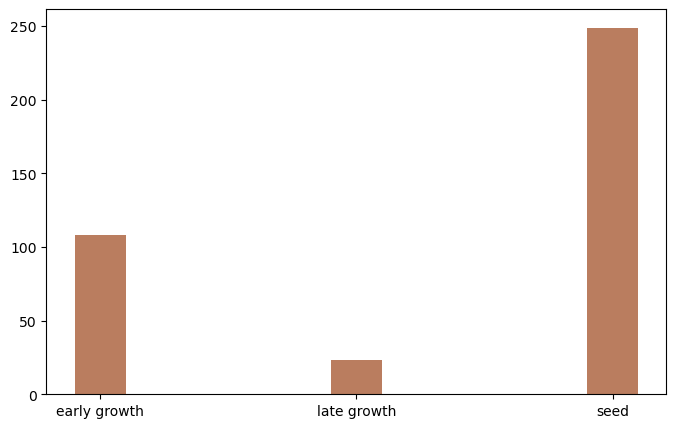

In [49]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(a['growth_stage'], a['total_funding'], width=0.2,  align='center', color = "#ba7d5f")
ax.bar(a['growth_stage']+0.2, a['last_funding'], width=0.2, align='center', color ="#efb284")
ax.set_title('', size = 15)
plt.gca().legend(('Nº Adultos','Nº Niños/as'))
plt.show()
